In [ ]:
# import libraries
import numpy as np
from keras.datasets import mnist

(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


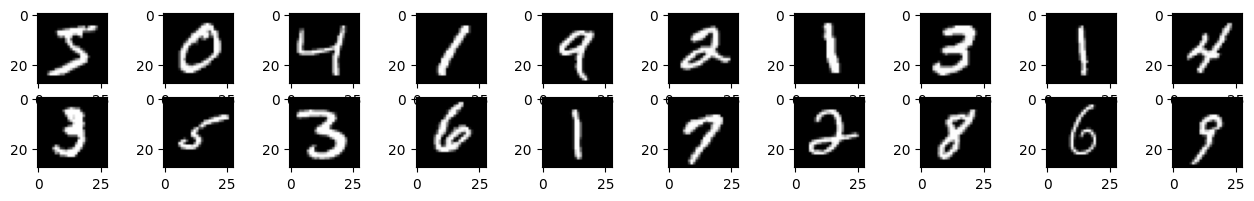

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,10,figsize=(16,2))
count=0

for i in range(2):   # Number of rows
  for j in range(10):  # Number of cloumns
    axes[i,j].imshow(X_train[count], cmap = 'gray')  # cmap=gray  -> it's optional
    count+=1


In [ ]:
# Normalize the bothe trainning and testing dataset
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
# Add the noise onto images
# preapare the souce data and add some random noise with the normal distribution
noise_factor=0.5
X_train_noise=X_train+noise_factor * np.random.normal(loc=0.,scale=1.,size=X_train.shape)
X_test_noise= X_test + noise_factor * np.random.normal(loc=0., scale=1.,size=X_test.shape)
print(X_train.shape)
print(Y_train.shape)

(60000, 28, 28)
(60000,)


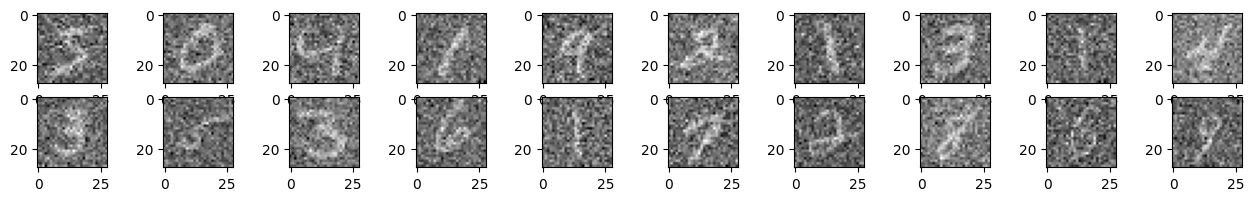

In [ ]:
# visualize the noisy data
import matplotlib.pyplot as plt
fig,axes = plt.subplots(2,10,figsize=(16,2))
count=0

for i in range(2):   # Number of rows
  for j in range(10):  # Number of cloumns
    axes[i,j].imshow(X_train_noise[count], cmap = 'gray')  # cmap=gray  -> it's optional
    count+=1

In [ ]:
# Reshape the dataset into 3D
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

X_train_noise=X_train_noise.reshape(X_train_noise.shape[0],28,28,1)
X_test_noise= X_test_noise.reshape(X_test_noise.shape[0],28,28,1)

X_train.shape, X_train_noise.shape

((60000, 28, 28, 1), (60000, 28, 28, 1))

In [ ]:
# create encoder
from keras.layers import Input,Conv2D,MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [ ]:
# encoder
encoder_input=Input(shape=X_train.shape[1:])
x=Conv2D(32,(3,3),activation='relu',padding='same')(encoder_input)
x=BatchNormalization()(x)
x=MaxPool2D(pool_size=(2,2),padding='same')(x)
x=Conv2D(32,(3,3),activation='relu', padding='same')(x)
x=BatchNormalization()(x)
encoded= MaxPool2D(pool_size=(2,2),padding='same')(x)

In [ ]:
#Decoder

x=Conv2D(32,(3,3),activation='relu',padding='same')(encoded)
x=BatchNormalization()(x)
x=UpSampling2D()(x)
x=Conv2D(32,(3,3),activation='relu', padding='same')(x)
x=BatchNormalization()(x)
x=UpSampling2D()(x)
decoded= Conv2D(1,(3,3),activation='sigmoid',padding='same')(x)

In [ ]:
from keras.models import Model
autoencoder=Model(encoder_input,decoded,name="denoising_model")
autoencoder.summary()

Model: "denoising_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)   

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
# train the model
from keras.callbacks import ModelCheckpoint

checkpoint= ModelCheckpoint("denoising_model.h5",save_best_only=True,save_weights_only=False,verbose=1)
history= autoencoder.fit(X_train_noise,X_train,batch_size=128,epochs=5,callbacks=checkpoint,validation_split=0.25,verbose=2)
#print(X_train.shape, X_train_noise.shape)

Epoch 1/5

Epoch 1: val_loss improved from inf to 0.19926, saving model to denoising_model.h5
352/352 - 157s - loss: 0.1851 - val_loss: 0.1993 - 157s/epoch - 445ms/step
Epoch 2/5

Epoch 2: val_loss improved from 0.19926 to 0.10392, saving model to denoising_model.h5
352/352 - 143s - loss: 0.1040 - val_loss: 0.1039 - 143s/epoch - 406ms/step
Epoch 3/5

Epoch 3: val_loss improved from 0.10392 to 0.10195, saving model to denoising_model.h5
352/352 - 142s - loss: 0.1007 - val_loss: 0.1019 - 142s/epoch - 403ms/step
Epoch 4/5

Epoch 4: val_loss improved from 0.10195 to 0.09984, saving model to denoising_model.h5
352/352 - 142s - loss: 0.0991 - val_loss: 0.0998 - 142s/epoch - 403ms/step
Epoch 5/5

Epoch 5: val_loss improved from 0.09984 to 0.09853, saving model to denoising_model.h5
352/352 - 142s - loss: 0.0981 - val_loss: 0.0985 - 142s/epoch - 402ms/step


In [ ]:
# check it loaded properly or not and take the summary
from keras.models import load_model
autoencoder= load_model('denoising_model.h5')
autoencoder.summary()


Model: "denoising_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)   

In [ ]:
# visualize the data
def visualize_data(data,row,column):
  data=data.reshape(data.shape[0],28,28)
  count=0
  fig,axes = plt.subplots(row,column,figsize=(16,4))
  for i in range(row):
    for j in range(column):
      axes[i,j].imshow(data[count])
      count+=1

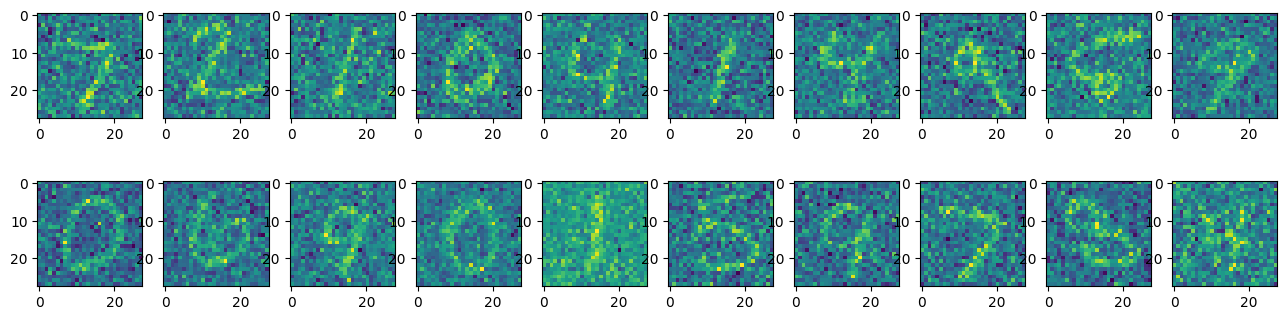

In [ ]:
visualize_data(X_test_noise[:20],2,10)

In [ ]:
pred=autoencoder.predict(X_test[:20])
pred.shape

1/1 [==============================] - 0s 173ms/step


(20, 28, 28, 1)